In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.chdir('/content/drive/MyDrive/traffic signs')

**Loading our DATA images and there respective labels into empty lists**

In [ ]:
data = [] #This will store image's numpy arrays
labels = [] #This will store image's labels
classes =58
cur_path = os.getcwd()
for i in range(classes):     
    path = os.path.join(cur_path,'DATA',str(i))     
    images = os.listdir(path)
    for a in images:
      try:
        image = Image.open(path +'//'+ a)             
        image = image.resize((30,30))                                                  
        image =np.array(image)  #Converting images into numpy array           
        data.append(image)  
        labels.append(i)
      except Exception as e:
        print(e)
        
  

In [ ]:
data = np.array(data) #finally we have to convert this list into a numpy array as our ANN will take only numpy array as an input
labels = np.array(labels) #same here

In [ ]:
data.shape #4170 images, resized to 30,30 and 3 tell that the image is not 'Black and White' but 'coloured'

(4170, 30, 30, 3)

In [ ]:
labels.shape

(4170,)

**Splitting into 80% Training set and 20% test**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3336, 30, 30, 3) (834, 30, 30, 3) (3336,) (834,)


**Now splitting test set into further 50% test set and 50% validation set. Therefore we get 80-10-10 split**

In [ ]:
X_test, X_val, y_test, y_val =train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print(X_test.shape, X_val.shape, y_test.shape, y_val.shape)

(417, 30, 30, 3) (417, 30, 30, 3) (417,) (417,)


In [ ]:
y_test.shape

(417,)

**Converting all y values into one hot encoded vectors**

In [ ]:
y_train = to_categorical(y_train,58) 
y_test = to_categorical(y_test,58)
y_val = to_categorical(y_val,58)

In [ ]:
model =Sequential() 

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25)) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 

model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Dropout(rate=0.25)) 

model.add(Flatten()) 

model.add(Dense(256, activation='relu')) 

model.add(Dropout(rate=0.5))

model.add(Dense(58, activation='softmax')) # We have 58 classes that's why we have defined 58 in the dense model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 15
val_history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
105/105 [==============================] - 17s 154ms/step - loss: 4.0452 - accuracy: 0.1793 - val_loss: 2.3175 - val_accuracy: 0.4628
Epoch 2/15
105/105 [==============================] - 14s 133ms/step - loss: 2.0112 - accuracy: 0.4817 - val_loss: 1.1984 - val_accuracy: 0.7314
Epoch 3/15
105/105 [==============================] - 14s 132ms/step - loss: 1.3712 - accuracy: 0.6490 - val_loss: 0.8269 - val_accuracy: 0.8106
Epoch 4/15
105/105 [==============================] - 16s 150ms/step - loss: 1.0413 - accuracy: 0.7125 - val_loss: 0.6007 - val_accuracy: 0.8585
Epoch 5/15
105/105 [==============================] - 14s 132ms/step - loss: 0.8379 - accuracy: 0.7695 - val_loss: 0.4556 - val_accuracy: 0.8897
Epoch 6/15
105/105 [==============================] - 14s 132ms/step - loss: 0.6791 - accuracy: 0.8144 - val_loss: 0.4316 - val_accuracy: 0.8921
Epoch 7/15
105/105 [==============================] - 18s 170ms/step - loss: 0.5948 - accuracy: 0.8354 - val_loss: 0.3244 - val_ac

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 15
test_history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
105/105 [==============================] - 17s 156ms/step - loss: 0.3242 - accuracy: 0.9125 - val_loss: 0.1087 - val_accuracy: 0.9760
Epoch 2/15
105/105 [==============================] - 14s 133ms/step - loss: 0.2763 - accuracy: 0.9260 - val_loss: 0.1188 - val_accuracy: 0.9784
Epoch 3/15
105/105 [==============================] - 14s 132ms/step - loss: 0.2312 - accuracy: 0.9293 - val_loss: 0.1128 - val_accuracy: 0.9760
Epoch 4/15
105/105 [==============================] - 14s 134ms/step - loss: 0.2431 - accuracy: 0.9305 - val_loss: 0.1094 - val_accuracy: 0.9832
Epoch 5/15
105/105 [==============================] - 18s 170ms/step - loss: 0.2241 - accuracy: 0.9353 - val_loss: 0.1155 - val_accuracy: 0.9616
Epoch 6/15
105/105 [==============================] - 17s 162ms/step - loss: 0.2805 - accuracy: 0.9239 - val_loss: 0.1181 - val_accuracy: 0.9640
Epoch 7/15
105/105 [==============================] - 18s 174ms/step - loss: 0.2401 - accuracy: 0.9353 - val_loss: 0.0765 - val_ac

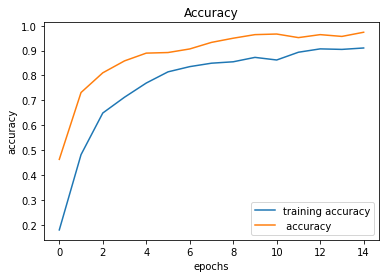

In [ ]:
#val accuracy 
plt.figure(0)
plt.plot(val_history.history['accuracy'], label='training accuracy')
plt.plot(val_history.history['val_accuracy'], label=' accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

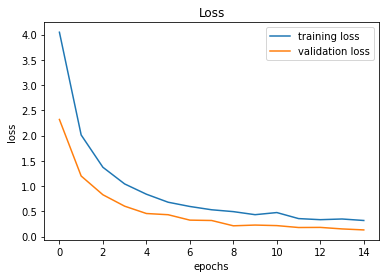

In [ ]:
#val Loss

plt.plot(val_history.history['loss'], label='training loss')
plt.plot(val_history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

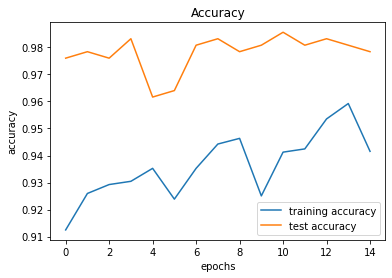

In [ ]:
#test accuracy 
plt.figure(0)
plt.plot(test_history.history['accuracy'], label='training accuracy')
plt.plot(test_history.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

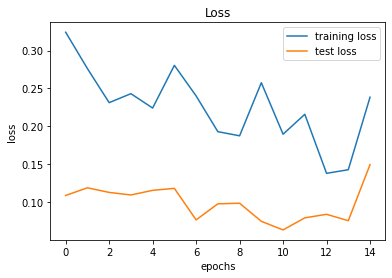

In [ ]:
#test Loss

plt.plot(test_history.history['loss'], label='training loss')
plt.plot(test_history.history['val_loss'], label='test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Bellow comments is the code to check random images on our trained model**

In [ ]:
# label_set = pd.read_csv('/content/drive/MyDrive/traffic signs/labels.csv')
# image = Image.open('/content/drive/MyDrive/traffic signs/TEST/007_0005_j.png')
# image = image.resize((30,30))
# image = np.array(image)
# imgarray = []
# imgarray.append(image)

In [ ]:
# label_set

In [ ]:
# imgarray = np.array(imgarray)

In [ ]:
# plt.imshow(image)

In [ ]:
# v = model.predict(imgarray)

In [ ]:
# np.argmax(model.predict(imgarray))

In [ ]:
# for i in range(0,57):
#   if label_set['ClassId'][i] == np.argmax(model.predict(imgarray)):
#     print(label_set['Name'][i])

**Lets predict our test set results**

In [ ]:
test_set_Predictions = []
for i in model.predict(X_test):
  test_set_Predictions.append(np.argmax(i))


In [ ]:
test_set_Predictions = np.array(test_set_Predictions)

In [ ]:
test_set_Predictions

**y_test is in one hot encoded form and hence to check the accuracy score between y_test and test_set_Predictions, we have to one hot encode test_set_Predictions too**

In [ ]:
test_set_Predictions = to_categorical(test_set_Predictions,58) 

In [ ]:
from sklearn.metrics import accuracy_score

**Final accuracy score between the Test set predictions and the actual test set results**

In [ ]:
accuracy_score(y_test, test_set_Predictions)

0.9784172661870504